# ![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/50px-Python-logo-notext.svg.png) **Modelo 2do parcial** ![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/50px-Python-logo-notext.svg.png)



###**florencia.dias@unahur.edu.ar** ###

# **Ejercicio 1** (TDA Diccionario)

Escribir una función **intercambiaClaveValor(diccionario)** que recibe un diccionario y retorna otro intercambiando las claves con los valores del original. Si en el diccionario original hay un valor duplicado, en el diccionario de salida queda como clave y como valor se debe poner una lista con las claves originales.

Se debe resolver usando las operaciones del TDA Diccionario que vimos en clase, sin violar el encapsulamiento ni utilizando estructuras auxiliares. Si es necesario definir funciones auxiliares. No se aceptarán soluciones que no creen ni utilicen el diccionario.

Ejemplo:

si dic1 = { (1, 2) , (2, 3) , (4, 2) , (3, 1) , (8, 9) , (7, 1) }

entonces al invocar intercambiaClaveValor(dic1) se retorna: { (2 , [1 , 4]) , (3 , [2]) , (1 , [3 , 7]) , (9 , [8]) }


In [ ]:
import copy as cp

class Diccionario:
  #######TDA tupla clave-significado#########################
  class __TuplaDic:
    def __init__(self, key, value):
      self.__data = (key,value)

    def __repr__(self):
      return str(self.__data)

    def __eq__(self, key):
      return self.__data[0] == key

    def __hash__(self):
      return hash(self.__data[0])

    def getKey(self):
      return self.__data[0]

    def getValue(self):
      return self.__data[1]
  ############################################################

  ###Constructor recibe dos listas de claves y significados en orden
  def __init__(self, keys = None, values = None):
    self.__diccionario = set()
    if keys != None:
      if len(keys) == len(values):
        for i in range(len(keys)):
          self[keys[i]] = values[i]
      else:
        raise Exception("Las listas de pares clave-significado deben tener la misma cantidad")

  def __repr__(self):
    return str(self.__diccionario)

  ###Asignacion usando [], se recibe clave entre corchetes / Permite reemplazar aunque exista la clave
  def __setitem__(self, key = None, value = None):
    if key != None:
      if key in self:
        self.__diccionario.remove(key)
      self.__diccionario.add(Diccionario.__TuplaDic(key,value))

  ###No inserta si existe la clave, es decir, si la clave existe en el dicc no modifica el valor
  def insert(self, key = None, value = None):
    if key != None:
      self.__diccionario.add(Diccionario.__TuplaDic(key,value))

  ###Elimina si existe la clave, es decir, si la clave existe en el dicc elimina el par clave-valor
  ###Sino existe la clave, no hace nada
  def remove(self, key):
    if key in self:
        valor = self[key]
        self.__diccionario.remove(key)
        return valor

  ###Vacia dicc
  def clear(self):
    self.__diccionario = set()

  ###Clonar dicc
  def clone(self):
    return cp.deepcopy(self)

  ###Acceso a valores usando [], se recibe clave entre corchetes
  def __getitem__(self, key):
    value = None
    flag = False
    for tuplaDic in self.__diccionario:
      if tuplaDic.getKey() == key:
        value = tuplaDic.getValue()
        flag = True
    if flag:
      return value
    else:
      raise Exception("No existe la clave %s en el diccionario" % (key))

  ###Retorna valor de la clave que se recibe por parametro
  def get(self, key):
    value = None
    flag = False
    for tuplaDic in self.__diccionario:
      if tuplaDic.getKey() == key:
        value = tuplaDic.getValue()
        flag = True
    if flag:
      return value
    else:
      raise Exception("No existe la clave %s en el diccionario" % (key))

  ###Retorna lista con claves
  def keys(self):
    return [x.getKey() for x in self.__diccionario]

  ###Retorna lista con valores
  def values(self):
    return [x.getValue() for x in self.__diccionario]

  ###Operador "in"
  def __contains__(self, key):
    return key in self.__diccionario

  ###Tamaño de diccionario
  def len(self):
    return len(self.__diccionario)

In [ ]:
#Ejercicio 1
#dic1 = { (1, 2) , (2, 3) , (4, 2) , (3, 1) , (8, 9) , (7, 1) }

#dicSalida = {
#     1: [3, 7],
#     2: [1 , 4],
#     3: [2],
# }

#si dic1 = { (1, 2) , (2, 3) , (4, 2) , (3, 1) , (8, 9) , (7, 1) }
#entonces al invocar intercambiaClaveValor(dic1) se retorna: { (2 , [1 , 4]) , (3 , [2]) , (1 , [3 , 7]) , (9 , [8]) }


llave =   [1,2,4,3,8,7]
valores = [2,3,2,1,9,1]
dic1 = Diccionario(keys = llave , values = valores)

print(dic1)

def intercambiaClaveValor(diccionario : Diccionario) -> Diccionario:
  dicAux = diccionario.clone()
  dicNuevo = Diccionario()
  for key in dicAux.keys():
     valor = dicAux[key]
     if valor in dicNuevo:
       lista = dicNuevo[valor]
       lista.append(key)
     else:
      dicNuevo[valor] = [key]
  return dicNuevo

print(intercambiaClaveValor(dic1))






{(1, 2), (2, 3), (3, 1), (4, 2), (7, 1), (8, 9)}
{(1, [3, 7]), (2, [1, 4]), (3, [2]), (9, [8])}


# **Ejercicio 2** (TDA Lista)

Escribir la función **parImpar** del **TDA Lista**, que recibe una lista de números enteros y la modifica eliminando elementos, de manera que nunca queden dos pares ni dos impares seguidos. Se puede usar la operación tieneSiguiente del TDA NodoLista.  NO se puede usar la operación eliminar del TDA Lista. **NO se puede usar el TDA Lista de Python.**

Ejemplo:

Si lista1 = [3, 7, 9, 4, 5, 2, 6, 11, 13, 12, 11] entonces luego de invocar lista1.parImpar(), lista1 debe quedar así:   [3, 4, 5, 2, 11, 12, 11]


In [ ]:
import copy as cp

########################################## LISTA ##########################################

class Lista: #Definimos la clase lista

########################################## NODO ##########################################

  class __NodoLista: #Una lista está compuestas por nodos. Los nodos en principio no tienen sentido por fuera de nuestra clase lista, por eso lo generamos dentro
    def __init__(self, dato): #El constructor del nodo. Para crear un nodo necesitamos el dato que vamos a alojar en esa posición
      self.dato = dato # Almacenamos el dato
      self.siguiente = None # Y cada nodo contiene la información de dónde va el siguiente nodo. Por defecto, si se crea un nodo no tiene siguiente

    def tieneSiguiente(self)->bool: #Creamos el método tieneSiguiente
      return self.siguiente != None # Da True cuando hay siguiente, es decir, el siguiente no es None

########################################## LISTA ##########################################

  def __init__(self): # Acá ya volvimos a los métodos de listas. Inicializamos como lista vacía
    self.__primero = None #Lo único que necesita saber la lista es si tiene primero, luego el primero referencia al segundo y así.

  def estaVacia(self)->bool: #Definimos nuestra función estaVacia, que devuelve un valor booleano
    return self.__primero == None #Si el primero es None es porque está vacía (si no tiene primero no puede tener el resto)

  def __repr__(self)->str: # Definimos el repr para poder verla al hacer print
    salida = "primero" # Empezamos indicando por dónde se empeiza a contar (en nuestro caso por como estamos construyendo será de izquierda a derecha)
    nodoAux = self.__primero # Este es el clásico recorrido de listas enlazadas, tenemos un nodo auxiliar que se irá moviendo sabiendo si el nodo tiene siguiente o no. Lo inicializamos en el primero.
    #Ojo. Notar que nodoAux, si bien llama a self, self.__primero es de tipo NODO, esto va a ocurrir todo el tiempo, hay que saber si estamos trabajando a nivel LISTA o a nivel NODO
    while nodoAux != None: # Mientras el nodoAuxiliar sea DISTINTO de None:
      salida += " -> " + str(nodoAux.dato) #Salida sumará una flechita y el dato que contiene el nodo auxiliar (el que estamos viendo)
      nodoAux = nodoAux.siguiente # Una vez guardado el dato cambiamos el nodoAux al siguiente (siguiente como método de nodo). Si fuese el último el siguiente sería NONE y ahí cortaría el while
    salida += " -|" #Una vez que corta el while cerramos con un pipe
    return salida #Retornamos la salida #primero -> 2 -> 3 -> 4 -|

  def tamaño(self)->int: # Definimos tamaño que devuelve un número entero
    cantNodos = 0 #Instanciamos nuestro contador de nodos empezando en cero
    nodoAux = self.__primero # Comenzamos el clásico recorrido de listas. Creamos un nodo auxiliar y lo fijamos en el primero
    while nodoAux != None: #Mientras nodo auxiliar sea distinto de None
      cantNodos += 1 #Sumamos uno al contador
      nodoAux = nodoAux.siguiente # Nos movemos al siguiente
    return cantNodos #Retornamos el contador

  def agregarAlFinal(self, dato)->None: #Agregar al final no retorna nada, solo agrega un elemento al final de la lista
    nodoNuevo = Lista.__NodoLista(dato) # Primero debemos generar un nodo nuevo, así que instanciamos un NodoLista de la clase Lista con el dato que queremos alojar en dicho nodo
    if self.estaVacia(): #Si la lista está vacía
      self.__primero = nodoNuevo # El primer nodo será un nodo nuevo
    else: #Sino, es decir, si la lista NO está vacía (ya contiene elementos)
      nodoAux = self.__primero # Comenzamos nuestro clásico recorrido hasta encontrar el último, por lo tnato definimos un nodo auxiliar como el primero
      while nodoAux.tieneSiguiente(): #Mientras el nodo auxiliar tenga siguiente. Ojo acá. Porque antes movíamos el nodoAux hasta que sea None. Ahora no queremos que sea None, queremos quedarnos en el último, por eso hay que ver si tiene siguiente. En este tipo de recorridos no tenemos como "volver atrás". Si llegamos hasta el None no tenemos una función del estilo "nodo anterior", por eso itera con el while hasta "tieneSiguiente"
        nodoAux = nodoAux.siguiente #El nodoAux será ahora el siguiente. Este while se corta cuando NO tenga siguiente, etnonces nodoAux será el último nodo posible (que es distinto de None)
      nodoAux.siguiente = nodoNuevo # Hacemos que el siguiente del último nodo (nodoAux) sea el nodoNuevo

  def insertar(self, posIns, dato)->None: #Definimos insertar que agrega un elemento a la lista pero en una posición particular, así que tomamos una posición para Insertar, un dato y no retornamos nada
    nodoNuevo = Lista.__NodoLista(dato) # Instanciamos el nodo que queremos insertar con el dato dado.
    if posIns >= 0: #Si la posición donde vamos a insertar es mayor o igual a cero (es decir, es una posición válida)
      if self.estaVacia(): # Si la lista está vacía
        self.__primero = nodoNuevo # El primer nodo será el nuevo (pues está vacía)
      elif posIns == 0: #Si NO está vacía pero la posición a insertar es la 0 (la primera)
        nodoNuevo.siguiente = self.__primero #Entonces el siguiente del nodo nuevo será el que estaba originalmente como el primero (que ahora es el segundo). El resto de los nodos sigue exactamente igual (este "primero" que ahora es "segundo" sigue referenciando al "segundo" que ahora pasa a ser el "tercero" y así todo el rato)
        self.__primero = nodoNuevo # Y el primero pasa a ser el nodo nuevo.
      else: #Sino, es decir, si la lista NO está vacía y la posición a insertar es DISTINTA de 0:
        nodoAux = self.__primero # Empiezo mi recorrido sobre listas enlazadas. Defino un nodoAux que comienza en la primer posición
        posAux = 0 #Necesito ir contantdo las posiciones para saber cuándo llego a donde quiero insertar, por eso tengo que instanciar un contador inicializado en cero
        while nodoAux.tieneSiguiente() and posAux < posIns-1: #Mientas mi nodoAux tiene siguiente (En caso que me hayan dado una posición más grande que mi lista) Y (AND) la posición auxiliar es UNA ANTES de la posición donde quiero insertar (acá de nuevo, no quiero llegar hasta el final final, me quiero quedar uno antes)
          nodoAux = nodoAux.siguiente #Nodo aux pasa a aser el siguiente
          posAux += 1 #Sumo uno al contador
        #En este punto salí del while, así que una de dos, o NO hay siguiente o estoy en la posición anterior a donde quiero insertar el nuevo valor (nodo).
        #Acá es desición de dieseño, si mi lista tiene 3 elementos y me indicaron la posición 300 se va a guardar en el final, podría lanzar una excepción, pero queda a criterio de quien desarrolle (o de quien lo pida)
        # Por ejemplo si:
        # lista = [10 , 20 , 30 , 40 , 50]
        # lista.insertar(2 , 555)
        # entonces en este punto para salir del while posAux == 1 (porque es 2 - 1)
        nodoNuevo.siguiente = nodoAux.siguiente # ENtonces el siguiente del nodoAux debe ser el 30 (que es donde quiero insertar el nuevo valor), por lo tanto el siguiente del nodoNuevo debe ser el 30
        nodoAux.siguiente = nodoNuevo # Y el nodoAux que está parado en 20 le tengo que decir que el siguiente ya no es el 30 sino que es el NodoNuevo (555)
        # lista será entonces [10 , 20 , 555 , 30 , 40 , 50]
    else: #Sino, es decir, me dieron una posición menor que cero
      raise IndexError("La posicion debe ser mayor o igual a cero") #Lanzamos una excepción. Notar que en este caso no es genérica, es un INDEX ERROR

  def eliminar(self, posDel)->any: #Definimos la función eliminar que recibe la posición del elemento que queremos eliminar
    datoDel = None # Inicializamos nuestra variable dato eliminado como None
    if 0 <= posDel < self.tamaño(): #Si la posición que queremos eliminar está entre 0 y el tamaño de la lista (es decir, dentrod el rango válido)
      if posDel == 0: #Si la posición es 0 (es decir, queremos eliminar el primero)
        datoDel = self.__primero.dato #El dato eliminado será el dato alojado en el primer nodo
        self.__primero = self.__primero.siguiente #El primer nodo será entonces el siguiente del primero, después queda todo igual.
      else: #Sino, es decir, la posición que queremos eliminar es dinstinta de cero
        nodoAux = self.__primero #Empezamos a recorrer as always. Inicializamos nuestro nodoAuxiliar en el primero
        posAux = 0 #Empezamos a contar posiciones desde 0
        while posAux < posDel-1: # Me quiero quedar parado uno antes de la posicion a eliminar por el mismo motivo que en insertar, sino no puedo hacer nada con el nodo en el que estoy parado.
          nodoAux = nodoAux.siguiente #Entonces mientras la posición sea menor que la anterior a la que quiero eliminar, el nodoAux será el siguiente
          posAux += 1 #La posición se incrementa en uno
        #SALGO DEL WHILE, es decir que estoy un nodo atrás del que quiero eliminar (por construcción del while)
        datoDel = nodoAux.siguiente.dato # El dato eliminado será entonces el dato almacenado en el siguiente nodo al nodo auxiliar (el próximo)
        nodoAux.siguiente = nodoAux.siguiente.siguiente #El siguiente nodo al nodo donde estoy parado será entonces el siguiente del siguiente (me salteo uno). Y ya está!
    else: #Sino, es decir, tengo una posición para eliminar negativa o mayor al tamaño de mi lista
      raise IndexError("Posicion inválida") #Lanzamos un IndexError
    return datoDel #Retornamos el dato que eliminamos

  def obtener(self, posGet)->any: #Obtener recibe una posición y retorna el dato almacenado en esa posición
    datoGet = None # Inicializamos la variable resultado como None
    if 0 <= posGet < self.tamaño(): #Validamos el rango de posición al igual que en eliminar
      nodoAux = self.__primero #Comenzamos el recorrido como siempre. Inicializaos una variable nodoAux en el primer nodo de nuestra lista
      posAux = 0 #Inicializamos un contador de posiciones
      while posAux < posGet: #Acá no me quiero quedar uno antes (podría, pero no es necesario) porque solo quiero saber el valor del dato que tengo en esa posición, así que si llego hasta ahí no pasa nada porque no voy a modificar la lista, solo voy a consultar un elemento
        nodoAux = nodoAux.siguiente #Entonces mientras la posicion auxiliar sea menor a la que estoy buscando, me muevo al siguiente nodo
        posAux += 1 #Incremento uno a mi contador
      datoGet = nodoAux.dato #En este punto ya salí del while, es decir que posAux = posGet, por lo tanto nodoAux es el nodo que está en la posición que quiero saber el valor. Consulto en nodoAux el dato y lo guardo en datoGet. FIN
    else: #Sino, es decir, la posición es negativa o mayor al tamaño de mi lista
      raise IndexError("Posicion inválida") #Arrojamos un IndexError
    return datoGet #Retornamos el dato get

  def __getitem__(self, posGet)->any: #Cuando definimos __getitem__ estamos definiendo cómo se comporta nuestra lista si aplicamos los corchetes.
  # HACE LO MISMO QUE OBTENER, pero en vez de hacer
  # lista.obtener(3) nos permite hacer lista[3]
  # Trucazo no?
  # (Es lo mismo que veníamos haciendo con __repr__ que le indicamos cómo se debe comportar cuando le aplico print por ejemplo)
  # Esto es sobrecargar los operadores por defecto de python
    datoGet = None
    if 0 <= posGet < self.tamaño():
      nodoAux = self.__primero
      posAux = 0
      while posAux < posGet:
        nodoAux = nodoAux.siguiente
        posAux += 1
      datoGet = nodoAux.dato
    else:
      raise IndexError("Posicion inválida")
    return datoGet

  def __setitem__(self, posSet, datoSet)->None: #Así se podría sobrecargar algo del estilo "lista[3] = 555"
    #Reemplazar elemento de posicion posSet por datoSet en lista self
    pass

  def __contains__(self, datoIn)->bool: #Así se podría sobrecargar el operador IN para saber si "555 in lista" y eso retorne false o true
    #Sobrecarga del operador "in"
    pass

  def vaciar(self)->None: #Vaciar una lista es simplemente eliminar su primero (fijarlo como None)
    self.__primero = None

  def clonar(self):
    return cp.deepocopy(self) #Para clonar como es habitual tomamos la librería deepcopy

# **Ejercicio 3** (TDA ABB)

Escribir una función **maximaHoja** del TDA **ABB**, que retorna el elemento máximo entre todos los elementos de las hojas de un ABB. La operación puede hacer uso de las operaciones del TDA ABB: estaVacio y del TDA NodoArbol: tieneIzquierdo y tieneDerecho
Ejemplo: Si tenemos el siguiente ABB llamado **árbol 1**

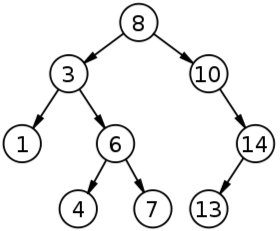

Entonces,

arbol1.maximaHoja() devuelve 13


In [ ]:
from graphviz import Digraph
import copy as cp

class ABB: # Creamos la clase árbol de busqueda binario
  def __init__(self): # Un árbol es solo una referencia a su raíz (que será un NODO)
    self.__raiz = None # Lo instanciamos con la raiz inicializada en None

  def estaVacio(self)->bool: # Estar vacío (no contener información) es igual a que la raíz sea NONE
    return self.__raiz == None

  def vaciar(self)->None: # Vaciar es asignar como None a la raiz
    self.__raiz = None

  def clonar(self): #Para clonar como hicimos con otras estructuras de datos, usamos deepcopy
    return cp.deepcopy(self)

  def treePlot(self, fileName='arbol')->None: # Cremos un método para plotear el árbol
    if not self.estaVacio(): # Si no está vacío:
      treeDot = Digraph() # Instanciamos un objeto Digraph() vacío
      treeDot.node(str(self.__raiz.dato), str(self.__raiz.dato)) # Le pasamos el nodo raiz (el nombre del nodo coincide con el dato almacenado)
      # https://networkx.org/documentation/stable/reference/classes/digraph.html siempre es bueno revisar la documentación si no entendemos algo
      self.__raiz.treePlot(treeDot) # Ahora para completar los nodos que nos faltan usamos treePlt pero SOBRE RAÍZ, es decir que es un método de NODO, no de árbol
      treeDot.render(fileName, view=True) # Finalmente renderizamos la imagen del árbol

  ##################################################################
  ##################################################################
  class __NodoArbol: # Ahora creamos la clase nodo, dentro del TDA árbol
    def __init__(self, dato): # Para instanciarlo necesitamos un dato
      self.dato = dato # Guardamos el dato
      self.izquierdo = None # Y el árbol va a tener una referencia izquierda
      self.derecho = None # Y una referncia derecha.

    def tieneIzquierdo(self)->bool: # Creamos métodos auxiliares para saber si un nodo tiene izquiedo
      return self.izquierdo != None # Es decir, su izquierdo es distinto de None

    def tieneDerecho(self)->bool: # Análogamente queremos saber si un nodo tiene derecho
      return self.derecho != None # Es decir, su derecho es distinto de None

    def grado(self)->int: # El grado de un nodo es la cantidad de hijos que tiene
      cantHijos = 0 # Inicilamente es cero
      if self.tieneIzquierdo():
        cantHijos += 1 # Si tiene izquierdo suma 1
      if self.tieneDerecho():
        cantHijos += 1 # Si tiene derecho también suma 1
      return cantHijos # Retorna la cantidad de hios (grado)

    def esHoja(self)->bool: # Es Hoja si no tiene hijos (ni izquierdo ni derecho)
      return self.grado() == 0 # Es lo mismo que pedir grador 0

    def treePlot(self, dot:Digraph)->None: # Esta función treePlot es A NIVEL NODO, esa diferecnia tiene con treePlot a nivel ÁRBOL
      if self.tieneIzquierdo(): # Si tiene izquierdo:
        dot.node(str(self.izquierdo.dato), str(self.izquierdo.dato)) # Agrego un nodo al gráfico (el que corresponde al izquierdo)
        dot.edge(str(self.dato), str(self.izquierdo.dato)) # Armo una conexión entre el nodo (self) y su izquierdo (self.izquierdo)
        self.izquierdo.treePlot(dot) # Hago un llamado recursivo sobre izquierdo, esto validará si izquierdo tiene hijos y así hará la vuelta recursiva
      else: #sino, es decir, no tiene izquierdo
        dot.node("-"+str(self.dato)+"l", "-") # Creo un nodo ficticio para ilustrar en el gráfico que no hay derecho (por eso la L (left))
        dot.edge(str(self.dato), "-"+str(self.dato)+"l") # Creo la conexión enter self y ese nodo ficticio
      if self.tieneDerecho(): # Para el lado derecho es totalmente análogo cada paso
        dot.node(str(self.derecho.dato), str(self.derecho.dato))
        dot.edge(str(self.dato), str(self.derecho.dato))
        self.derecho.treePlot(dot)
      else:
        dot.node("-"+str(self.dato)+"r", "-")
        dot.edge(str(self.dato), "-"+str(self.dato)+"r")

In [ ]:
# Seguimos agregando funcionalidad heredando lo que ya armamos
class ABB(ABB):
  def insertar(self, dato:int)->None: # Insertar toma un dato y no retorna nada
    nodoNuevo = ABB.__NodoArbol(dato) # Creamos un nuevo nodo
    if self.estaVacio(): # Si mi arbol está vacío
      self.__raiz = nodoNuevo # El nuevo nodo será la raíz
    else: # Sino, es decir, ya tengo datos en el árbol
      self.__raiz.insertarNodo(nodoNuevo) # Delegamos en la raíz la responsabilidad de ubicar el nuevo nodo

  class __NodoArbol(ABB.__NodoArbol): # Entonces tenemos que escribir un insertar pero a nivel Nodo
    def insertarNodo(self, nodoNuevo)->None: # InsertarNodo traerá el dato que se le pasó a insertar como parámetro y no retorna nada
      if nodoNuevo.dato < self.dato: # Si el dato contenido en el nodoNuevo es menor que el dato almacenado en el nodo en el que estoy parado (raíz si fuese la primer iteración):
        #El nuevo nodo va a la izquierda de self
        if not self.tieneIzquierdo(): # Y si NO tengo izquierdo:
          self.izquierdo = nodoNuevo # El izquierdo de SELF será entonces la raíz
        else: #Sino, es decir, TENGO IZQUIERDO
          self.izquierdo.insertarNodo(nodoNuevo) # Delego en el izquierdo la responasbilidad de acomodar el nuevo nodo
      elif nodoNuevo.dato > self.dato: # Sino, si el dato almacenado en el nodoNuevo es MAYOR que el dato de self (nodo en el que estoy parado, raíz si es la primera iteración):
        #El nuevo nodo va a la derecha de self
        if not self.tieneDerecho(): # Si NO tengo derecho
          self.derecho = nodoNuevo # Entonces el derecho de self será nodoNuevo
        else: # Sino, es decir, TENGO DERECHO
          self.derecho.insertarNodo(nodoNuevo) # Delego en el derecho la responsabiliad de insertar el nuevoNodo
      else: # Sino, es decir, el dato no es menor ni es mayor al de self (esto significa que el dato COINCIDE con el dato de self)
        raise Exception("No se admiten datos repetidos") # lanzo una excepción: en un árbol de búsqueda binario NO PUEDE haber número repetidos

NameError: name 'ABB' is not defined

In [ ]:
# Ejercicio 2 - Función parImpar
def parImpar(lista: Lista) -> None:
    """
    Modifica una lista de números enteros eliminando elementos,
    de manera que nunca queden dos pares ni dos impares seguidos.
    Se usa la operación tieneSiguiente del TDA NodoLista.
    NO se usa la operación eliminar del TDA Lista.
    """
    if lista.estaVacia() or not lista._Lista__primero.tieneSiguiente():
        return

    nodo_actual = lista._Lista__primero
    while nodo_actual is not None and nodo_actual.tieneSiguiente():
        nodo_siguiente = nodo_actual.siguiente
        if (nodo_actual.dato % 2 == nodo_siguiente.dato % 2):
            # Eliminar el siguiente nodo
            nodo_actual.siguiente = nodo_siguiente.siguiente
        else:
            nodo_actual = nodo_siguiente

# Para que la función pueda acceder a los atributos privados de Lista y NodoLista
# se accede a ellos usando _Lista__primero y _Lista__NodoLista

In [ ]:
# Ejemplo de uso
lista1 = Lista()
for x in [3, 7, 9, 4, 5, 2, 6, 11, 13, 12, 11]:
    lista1.agregarAlFinal(x)

print("Lista original:", lista1)
parImpar(lista1)
print("Lista modificada:", lista1)

Lista original: primero -> 3 -> 7 -> 9 -> 4 -> 5 -> 2 -> 6 -> 11 -> 13 -> 12 -> 11 -|
Lista modificada: primero -> 3 -> 4 -> 5 -> 2 -> 11 -> 12 -> 11 -|
